In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df_train = pd.read_csv('sales_train.csv')
df_test = pd.read_csv('test.csv')

# Data Exploration

In [23]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [25]:
df_train.shape

(2935849, 6)

In [26]:
df_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


we notice null value in the columns ['item_price' , 'item_cnt_day']

In [27]:
# explore the null values in the item_price
df_train[df_train['item_price']<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [28]:
# remove the row contain this null value
df_train = df_train[df_train['item_price']>0]
df_train.shape

(2935848, 6)

In [29]:
# explore the nule values in the item_cnt_day
df_train[df_train['item_cnt_day']<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


In [30]:
#remove the rows contain the null values
df_train = df_train[df_train['item_cnt_day']>0]
df_train.shape

(2928492, 6)

In [31]:
df_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [32]:
df_train['date_1'] = pd.to_datetime(df_train['date'], dayfirst=True)
df_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_1
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15
5,10.01.2013,0,25,2564,349.00,1.0,2013-01-10
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,2015-10-10
2935845,09.10.2015,33,25,7460,299.00,1.0,2015-10-09
2935846,14.10.2015,33,25,7459,349.00,1.0,2015-10-14
2935847,22.10.2015,33,25,7440,299.00,1.0,2015-10-22


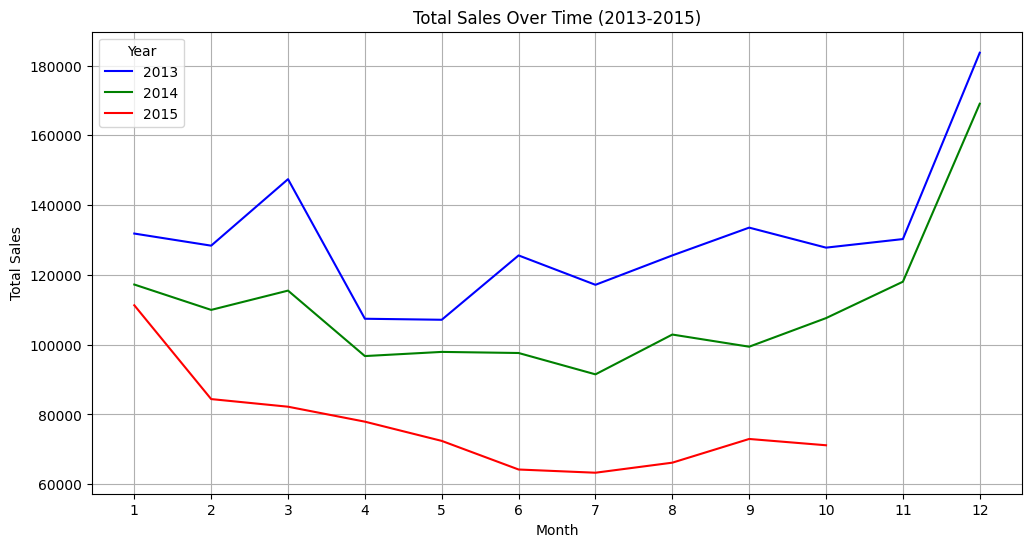

In [33]:
# extract data by deferent year than plot them
df_grouped = df_train.copy()
df_grouped = df_grouped.rename(columns={"item_cnt_day": "item_cnt_month"})
df_grouped['year'] = df_grouped['date_1'].dt.year
df_grouped['month'] = df_grouped['date_1'].dt.month
# Group by year and month to get the sum of item_cnt_month
df_grouped_1 = df_grouped.groupby(['year', 'month'])['item_cnt_month'].sum().reset_index()
# Extract data for each year
data_2013 = df_grouped_1[df_grouped_1['year'] == 2013]
data_2014 = df_grouped_1[df_grouped_1['year'] == 2014]
data_2015 = df_grouped_1[df_grouped_1['year'] == 2015]

# Plotting
plt.figure(figsize=(12, 6))

# Plotting data for each year
plt.plot(data_2013['month'], data_2013['item_cnt_month'], label='2013', color='b')
plt.plot(data_2014['month'], data_2014['item_cnt_month'], label='2014', color='g')
plt.plot(data_2015['month'], data_2015['item_cnt_month'], label='2015', color='r')

# Customizing the plot
plt.title('Total Sales Over Time (2013-2015)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend(title='Year')

# Set x-axis to display months from 1 to 12
plt.xticks(range(1, 13))

plt.show()

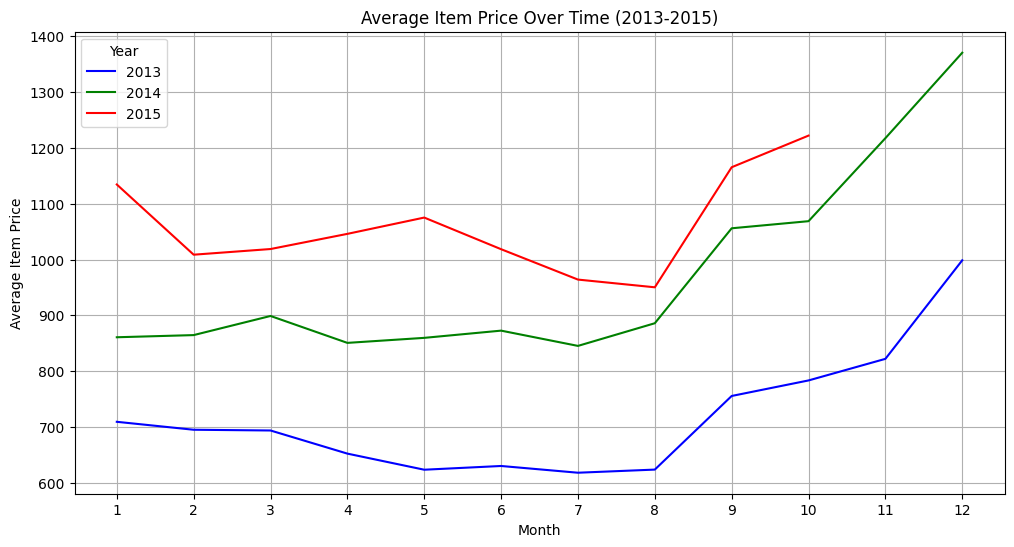

In [34]:
df_train['year'] = df_train['date_1'].dt.year
df_train['month'] = df_train['date_1'].dt.month

# Group by year and month to get the average item_price
df_grouped_price = df_train.groupby(['year', 'month'])['item_price'].mean().reset_index()

# Extract data for each year
price_2013 = df_grouped_price[df_grouped_price['year'] == 2013]
price_2014 = df_grouped_price[df_grouped_price['year'] == 2014]
price_2015 = df_grouped_price[df_grouped_price['year'] == 2015]

# Plotting
plt.figure(figsize=(12, 6))

# Plotting data for each year
plt.plot(price_2013['month'], price_2013['item_price'], label='2013', color='b')
plt.plot(price_2014['month'], price_2014['item_price'], label='2014', color='g')
plt.plot(price_2015['month'], price_2015['item_price'], label='2015', color='r')

# Customizing the plot
plt.title('Average Item Price Over Time (2013-2015)')
plt.xlabel('Month')
plt.ylabel('Average Item Price')
plt.grid(True)
plt.legend(title='Year')

# Set x-axis to display months from 1 to 12
plt.xticks(range(1, 13))

plt.show()


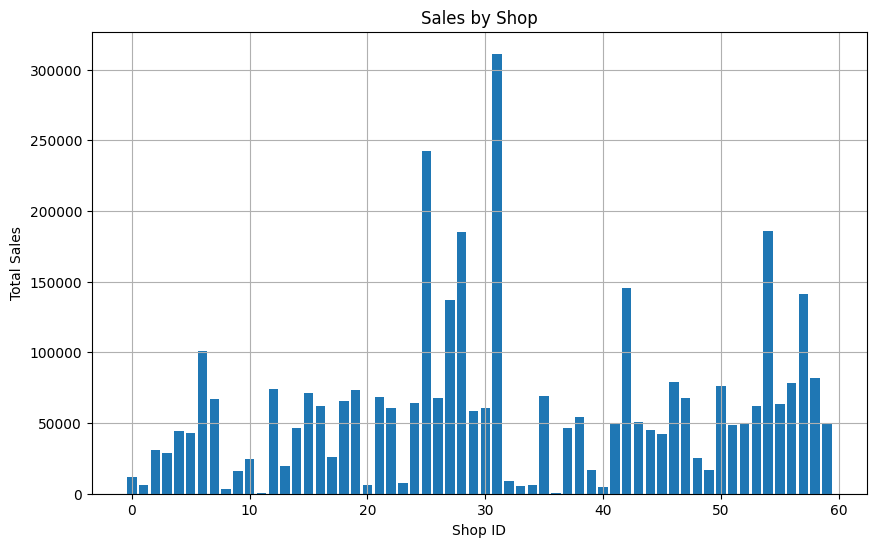

In [35]:
# Sales by Shop
df_grouped_shop = df_train.groupby('shop_id').agg({'item_cnt_day': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(df_grouped_shop['shop_id'], df_grouped_shop['item_cnt_day'])
plt.title('Sales by Shop')
plt.xlabel('Shop ID')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


In [36]:
df_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_1,year,month
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02,2013,1
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03,2013,1
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06,2013,1
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15,2013,1
5,10.01.2013,0,25,2564,349.00,1.0,2013-01-10,2013,1
...,...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,2015-10-10,2015,10
2935845,09.10.2015,33,25,7460,299.00,1.0,2015-10-09,2015,10
2935846,14.10.2015,33,25,7459,349.00,1.0,2015-10-14,2015,10
2935847,22.10.2015,33,25,7440,299.00,1.0,2015-10-22,2015,10
